In [1]:
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_rel, ttest_ind
from statsmodels.stats.multicomp import MultiComparison

In [2]:
a1c = pd.read_csv('output_a1c.csv', sep=' ', header=0)
dose = pd.read_csv('output_dose.csv', sep=' ', header=0)
female = pd.read_csv('output_female.csv', sep=' ', header=0)

df = pd.concat((a1c.x, dose.x, female.x), axis=1)
df.columns = ['a1c', 'dose', 'female']

In [3]:
anova_lm(ols('a1c ~ C(female)*C(dose)', df).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(female),1,69.940206,69.940206,9.099435,3.288979e-03
C(dose),2,189.875728,94.937864,12.351707,1.726785e-05
C(female):C(dose),2,363.588775,181.794387,23.652007,4.783521e-09
Residual,94,722.504122,7.686214,NaN,NaN


In [4]:
anova_lm(ols('a1c ~ C(dose)*C(female)', df).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(dose),2,195.036892,97.518446,12.687449,1.324639e-05
C(female),1,64.779042,64.779042,8.427952,4.603968e-03
C(dose):C(female),2,363.588775,181.794387,23.652007,4.783521e-09
Residual,94,722.504122,7.686214,NaN,NaN


In [5]:
# Type 2 vs. 1 SS
anova_lm(ols('a1c ~ C(dose)*C(female)', df).fit(), typ=2)

,sum_sq,df,F,PR(>F)
C(dose),189.875728,2,12.351707,1.726785e-05
C(female),64.779042,1,8.427952,4.603968e-03
C(dose):C(female),363.588775,2,23.652007,4.783521e-09
Residual,722.504122,94,NaN,NaN


In [6]:
# Type 2 vs. 1 SS
anova_lm(ols('a1c ~ C(dose)*C(female)', df).fit(), typ=2, robust='hc3')

,sum_sq,df,F,PR(>F)
C(dose),152.421669,2,9.915263,1.238364e-04
C(female),3.918587,1,0.509820,4.769859e-01
C(dose):C(female),396.150221,2,25.770179,1.193404e-09
Residual,722.504122,94,NaN,NaN


In [7]:
# Type 2 vs. 1 SS
print(anova_lm(ols('a1c ~ C(dose)', df.query('female == 0')).fit(), typ=2))
print(anova_lm(ols('a1c ~ C(dose)', df.query('female == 1')).fit(), typ=2))

              sum_sq  df          F    PR(>F)
C(dose)   353.726639   2  18.275466  0.000001
Residual  454.848932  47        NaN       NaN
              sum_sq  df          F    PR(>F)
C(dose)   199.737864   2  17.536891  0.000002
Residual  267.655190  47        NaN       NaN


In [8]:
mod = MultiComparison(df.query('female == 1').a1c, 
                      df.query('female == 1').dose.astype('category'))
mod.allpairtest(ttest_ind, method='b')[0]

group1,group2,stat,pval,pval_corr,reject
D1,D2,-5.0455,0.0,0.0001,True
D1,P,-4.9176,0.0,0.0001,True
D2,P,-0.8156,0.4204,1.0,False


In [9]:
mod = MultiComparison(df.query('female == 0').a1c, 
                      df.query('female == 0').dose.astype('category'))
mod.allpairtest(ttest_ind, method='b')[0]

group1,group2,stat,pval,pval_corr,reject
D1,D2,4.9215,0.0,0.0001,True
D1,P,-1.0473,0.3024,0.9071,False
D2,P,-6.1764,0.0,0.0,True


/Users/karasinski/.virtualenvs/Stats3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


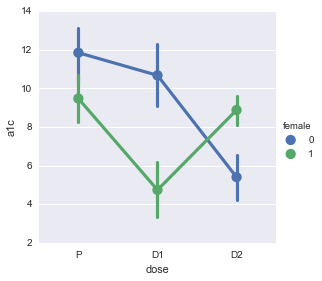

In [10]:
sns.factorplot(x='dose', y='a1c', hue='female', data=df, 
               order=['P', 'D1', 'D2'],
               ci=95)

In [11]:
glong = pd.read_csv('glong.csv', sep=' ')
glong['id'] = glong['id'].str.strip('id').astype(int)
glong['obs'] = glong['obs'].str.strip('t').astype(int)

/Users/karasinski/.virtualenvs/Stats3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


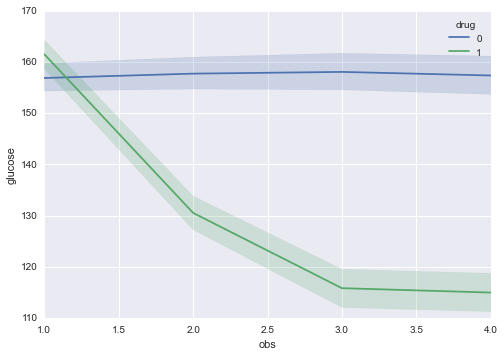

In [12]:
sns.tsplot(data=glong, 
           time='obs', unit='id',
           condition='drug', value='glucose',
           ci=95)

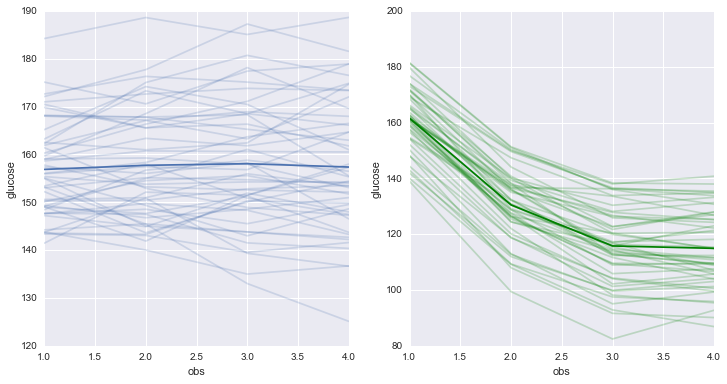

In [13]:
f, ax = plt.subplots(ncols=2, figsize=(12, 6))
sns.tsplot(data=glong.query('drug == 0'), 
           time='obs', unit='id',
           condition='drug', value='glucose',
           err_style="unit_traces", legend=False, ax=ax[0])
sns.tsplot(data=glong.query('drug == 1'), 
           time='obs', unit='id',
           condition='drug', value='glucose',
           err_style="unit_traces", legend=False, ax=ax[1], color='g')

In [14]:
import rpy2.robjects as ro

In [15]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()
import pandas.rpy.common as com

/Users/karasinski/.virtualenvs/Stats3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html
  app.launch_new_instance()


In [16]:
r_dataframe = com.convert_to_r_dataframe(glong)

In [17]:
ro.r.assign('glong', r_dataframe);

In [18]:
ro.r('print(summary(aov(glucose ~ drug + Error(id), data = glong)))')




Error: id



    
 Df
 Sum Sq
 Mean Sq

drug
  1
  60583
   60583





Error: Within



         
  Df
 Sum Sq
 Mean Sq
 F value
   Pr(>F)
    

drug     
   1
  12157
   12157
   37.42
 2.28e-09
 ***

Residuals
 397
 128965
     325
        
         
    


---
Signif. codes:  

0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




<ListVector - Python:0x10c2aa7c8 / R:0x7fb0aed18a60>
[ListVector, ListVector]
<ListVector - Python:0x10c2aa7c8 / R:0x7fb0aed18a60>
[ListVector, ListVector]
<ListVector - Python:0x10c2aa7c8 / R:0x7fb0aed18a60>
[ListVector, ListVector]